# Principal Component Anlaysis
<hr>

## 0. Import Library
<hr>

In [175]:
# Import libraries

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import time
import math

import warnings
warnings.filterwarnings('ignore')


## 1. Data
<hr>

load the data from the file

In [3]:
data = np.loadtxt('data-pca.txt', delimiter = ',')

x = data[:, 0]
y = data[:, 1]

plot original data points

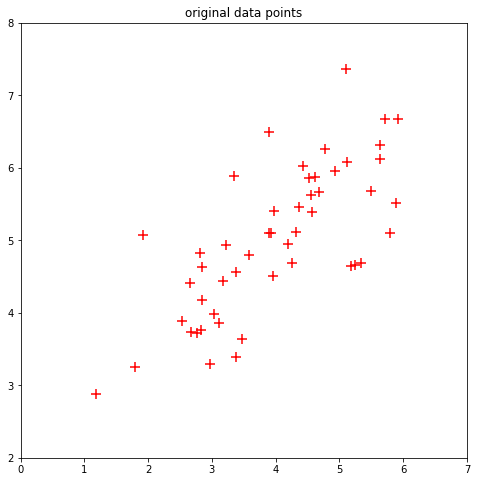

In [10]:
plt.figure(figsize = (8, 8))
plt.scatter(x, y, c = 'red', marker = '+', s = 120) 
plt.title('original data points')
plt.xlim(0, 7)
plt.ylim(2, 8)
plt.show()

## 2. Normalize Data
<hr>

define a function to normalize the input data points x and y

In [11]:
def normalize_data(x, y) :
    xn = (x - np.mean(x)) / np.std(x)
    yn = (y - np.mean(y)) / np.std(y)
    
    return xn, yn

plot the normalized data points

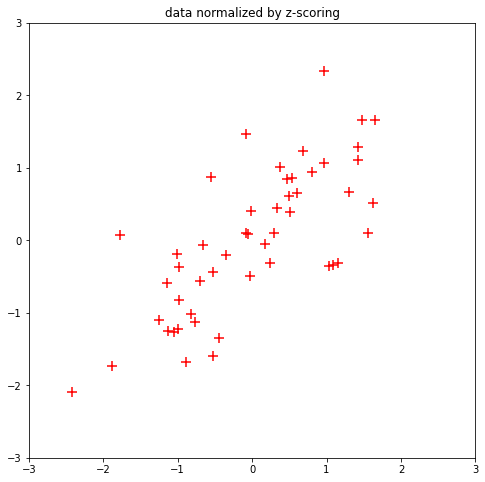

In [12]:
xn, yn = normalize_data(x, y)

plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120) 
plt.title('data normalized by z-scoring')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

## 3. Compute Covariance Matrix
<hr>

define a function to compute the co-variance matrix of the data

In [97]:
def compute_covariance(x, y):
    
    n = len(x)
    X = np.empty([0, n])
    X = np.append(X, x.reshape(1, -1), axis = 0)
    X = np.append(X, y.reshape(1, -1), axis = 0)
    
    covar = np.dot(X.T, X) / n
    
    return X, covar


In [98]:
X, covar = compute_covariance(xn, yn)
print(X.shape)
print(covar.shape)

(2, 50)
(50, 50)


## 4. Principal Direction
<hr>

define a function to compute the principal directions from the co-variance matrix

In [59]:
def compute_principal_direction(covariance):

    w, v = np.linalg.eig(covariance)
    idx = w.argsort()[::-1]
    v = v[:, idx]
    
    return v

In [66]:
principal_direction = compute_principal_direction(covar)
print(principal_direction.shape)

(50, 50)


## 5. Compute Projection
<hr>

define a function to compute the projection of the data point onto principal axis

In [228]:
def compute_projection(point, axis):

    Z = np.dot(axis.T, point)
    projection = np.dot(axis, Z)
    npx, npy = normalize_data(projection[0,:], projection[1,:])
    
    return npx, npy

In [229]:
axis1 = -X.dot(principal_direction[:, :1])
axis2 = -X.dot(principal_direction[:, 1:2])
npx1, npy1 = compute_projection(X, axis1)
npx2, npy2 = compute_projection(X, axis2)
print(axis1.shape)
print(axis2.shape)
axis1 = axis1.astype(dtype = 'float64')
axis2 = axis2.astype(dtype = 'float64')

(2, 1)
(2, 1)


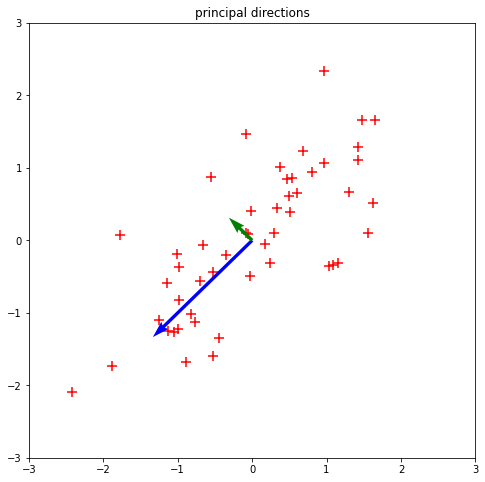

In [230]:
plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120)
plt.quiver([0], [0], axis1[0], axis1[1], angles = 'xy', color = 'blue', scale = 30)
plt.quiver([0], [0], axis2[0], axis2[1], angles = 'xy', color = 'green', scale = 50)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('principal directions')
plt.show()

In [302]:
xmin, xmax = xn.min(), xn.max()
xx = np.linspace(xmin, xmax, 1000)

x_line1 = xx.reshape(1, -1)
y_line1 = (-axis1[0] * x_line1 + axis1[1]).reshape(1, -1)

x_line1, y_line1 = normalize_data(x_line1, y_line1)
x_lin

plt.figure(figsize = (8, 8))
plt.scatter(xn, yn, c = 'red', marker = '+', s = 120)
plt.scatter(x_line1, y_line1, c = 'blue', s = 1)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('fist principle axis')
plt.show()

SyntaxError: invalid syntax (<ipython-input-302-29ce8f39ca00>, line 11)

## 6. Compute Distance
<hr>

compute the Euclidean distance between point1 and point2

# [Output]
<hr>

## 1. Plot the original data points [1pt]

## 2. Plot the normalized data points [1pt]

## 3. Plot the principal axes [2pt]

## 4. Plot the first principal axis [3pt]

## 5. Plot the project of the normalized data points onto the first principal axis [4pt]

## 6. Plot the lines between the normalized data points and their projection points on the first principal axis [3pt]

## 7. Plot the second principal axis [3pt]

## 8. Plot the project of the normalized data points onto the second principal axis [4pt]

## 9. Plot the lines between the normalized data points and their projection points on the second principal axis [3pt]